In [18]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import jieba

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read data
positive_df = pd.read_csv('jd_data_pos.csv')
neutral_df = pd.read_csv('jd_data_mid.csv')
negative_df = pd.read_csv('jd_data_neg.csv')

# Merge data
data = pd.concat([positive_df.assign(sentiment='positive'), 
                  neutral_df.assign(sentiment='neutral'), 
                  negative_df.assign(sentiment='negative')])



In [6]:
data.head()

,Unnamed: 0,creationTime,hour,nickname,productType,score,content,days,sentiment
0,0,2024-09-11 22:13:43,22,"""二***3""","""【超能轻薄】Pro14英寸 OLED高刷""",5,"""运行速度：很快 跟老电脑比简直像火箭一样\n屏幕效果：通透 早知道买16寸了\n散热性能：...","1,""afterDays"":0",positive
1,1,2024-09-01 09:36:41,9,"""j***e""","""【超能轻薄】Pro14英寸 OLED高刷""",5,"""酷睿Ultra的处理器很流畅\n适应现在ai时代的ai电脑\n非常喜欢，以后使用一些ai的...","2,""afterDays"":0",positive
2,2,2024-09-07 10:58:03,10,"""峥***弟""","""【超能轻薄】Pro14英寸 OLED高刷""",5,"""酷睿Ultra很牛！智能AI、联想AI、酷睿AI！牛的！质量很好！新电脑用这特别舒服，还记...","3,""afterDays"":0",positive
3,3,2024-09-14 12:38:30,12,"""陌***y""","""【性能大屏】Pro16英寸 2.5K高刷""",5,"""真的强烈推荐，一分钱一分货，现在有政府补贴，价格已经冰点，非常值得入手。电脑运行速度快，续...","1,""afterDays"":11",positive
4,4,2024-09-13 22:49:04,22,"""j***O""","""【超能轻薄】Pro14英寸 OLED高刷""",5,"""酷睿Ultra用起来真的很好，速度快，智能化。同时笔记本设计也很新潮，美观，非常让人喜欢。...","2,""afterDays"":0",positive


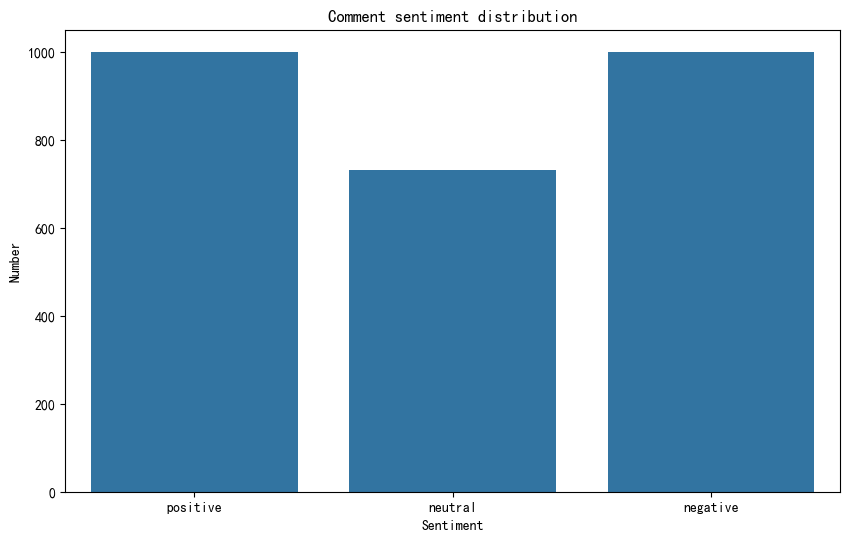

In [19]:
# Draw an emotional distribution map
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='sentiment')
plt.title('Comment sentiment distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number')
plt.show()

In [13]:
# Data preprocessing
def preprocess_text(text):
    # 使用jieba进行中文分词
    seg_list = jieba.cut(text, cut_all=False)
    # 重新组合成文本
    return ' '.join(seg_list)

data['processed_text'] = data['content'].apply(preprocess_text)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Administrator\AppData\Local\Temp\jieba.cache
Loading model cost 0.892 seconds.
Prefix dict has been built successfully.


In [14]:
# Feature extraction
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['processed_text'])
y = data['sentiment']

# Divide the training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)




LogisticRegression()

In [15]:
# Model prediction
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))



              precision    recall  f1-score   support

    negative       0.70      0.85      0.77       193
     neutral       0.69      0.51      0.59       152
    positive       0.96      0.95      0.95       202

    accuracy                           0.79       547
   macro avg       0.78      0.77      0.77       547
weighted avg       0.79      0.79      0.79       547

Accuracy: 0.7915904936014625


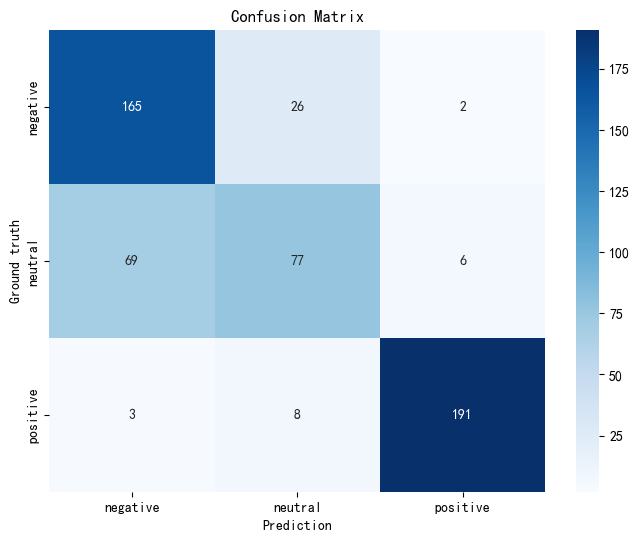

In [23]:
# Draw a confusion matrix for predicting results
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Ground truth')
plt.show()



In [22]:
# Save model
import joblib
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']